In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('axes',titlesize=30)
plt.rc('axes',labelsize=30)
plt.rc('font',size=10)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('legend',fontsize= 15)
pd.set_option('display.max_row', 50000)
plt.rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus']=False
%config InlineBackend.figure_format='retina'

In [2]:
import folium
import json
from folium import plugins
from folium.features import DivIcon

In [3]:
######## dataset 불러오기
df = pd.read_csv('야놀자!/통합_data/경기통합.csv',sep=',',encoding='cp949')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          3160 non-null   object 
 1   score         3160 non-null   float64
 2   loc           3160 non-null   object 
 3   lowest_price  3160 non-null   int64  
 4   category      3160 non-null   object 
 5   loc2          3160 non-null   object 
 6   SIG_CD        3160 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 172.9+ KB


In [5]:
print('경기도 숙박업소 개수 : ', len(df))
print('경기도 숙밥업소 모텔 개수 : ', (df['category']=='m').sum())
print('경기도 숙밥업소 호텔 개수 : ', (df['category']=='h').sum())
print('경기도 숙밥업소 팬션 개수 : ', (df['category']=='p').sum())
print('경기도 숙밥업소 게스트하우스 개수 : ', (df['category']=='g').sum())

경기도 숙박업소 개수 :  3160
경기도 숙밥업소 모텔 개수 :  1448
경기도 숙밥업소 호텔 개수 :  233
경기도 숙밥업소 팬션 개수 :  1449
경기도 숙밥업소 게스트하우스 개수 :  30


In [6]:
total = len(df)
mtotal = (df['category']=='m').sum()
htotal = (df['category']=='h').sum()
ptotal = (df['category']=='p').sum()
gtotal = (df['category']=='g').sum()

In [7]:
### sort
dfc1 = df.sort_values(by=['loc2','category'])

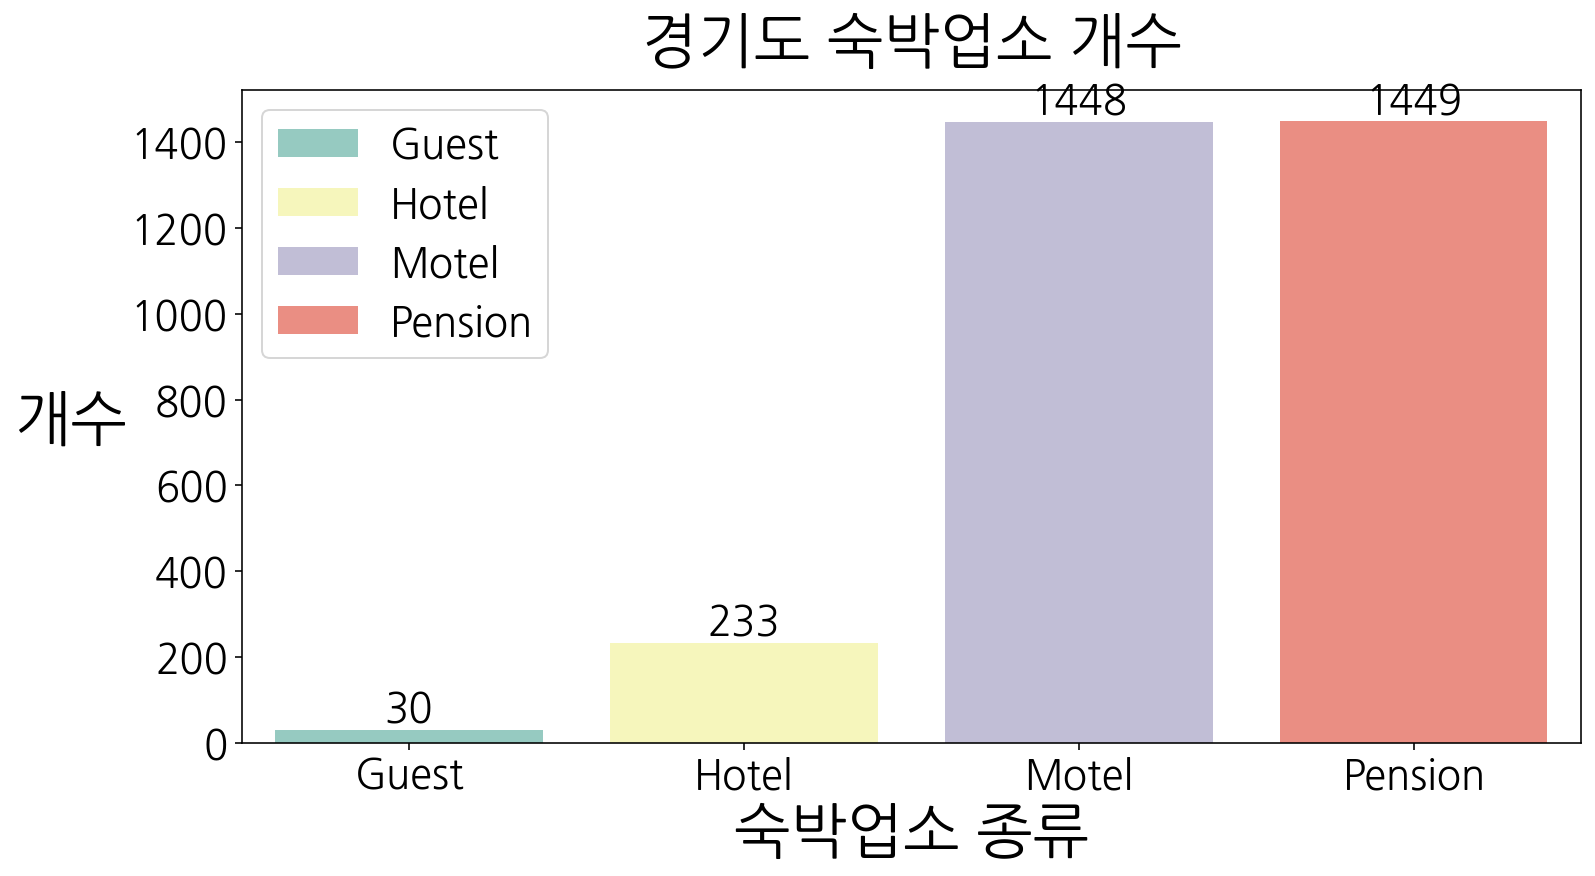

In [8]:
################### 경기도 숙박업소 개수 그래프
ax = plt.figure(figsize=(12,6))
ax = sns.countplot(data = dfc1, x='category',hue = 'category',palette='Set3',dodge=False)
ax.set_title('경기도 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('숙박업소 종류')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Guest','Hotel','Motel','Pension'])
ax.set_ylabel('개수',rotation=0,labelpad=30,position=(0,0.45,0))
plt.legend(labels=['Guest','Hotel','Motel','Pension'],fontsize=20)
plt.text(0,gtotal,gtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(1,htotal,htotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(2,mtotal,mtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(3,ptotal,ptotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.show()
#plt.savefig('경기도 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

In [9]:
########### 지도 시각화용 dataset
df2=df.groupby(df['loc2']).mean()
df2.reset_index(level=['loc2'],inplace=True)
df_count=df.groupby('loc2').size()
df_count.reset_index(drop=True,inplace=True)
df2['count']=df_count
df2 = df2.sort_values(by='lowest_price',ascending=False)
df2.reset_index(drop=True,inplace=True)
df2['SIG_CD'] = df2['SIG_CD'].astype(str)
df2['SIG_CD'] = df2['SIG_CD'].str.replace('.','')
df2['SIG_CD'] = df2['SIG_CD'].str[0:5]

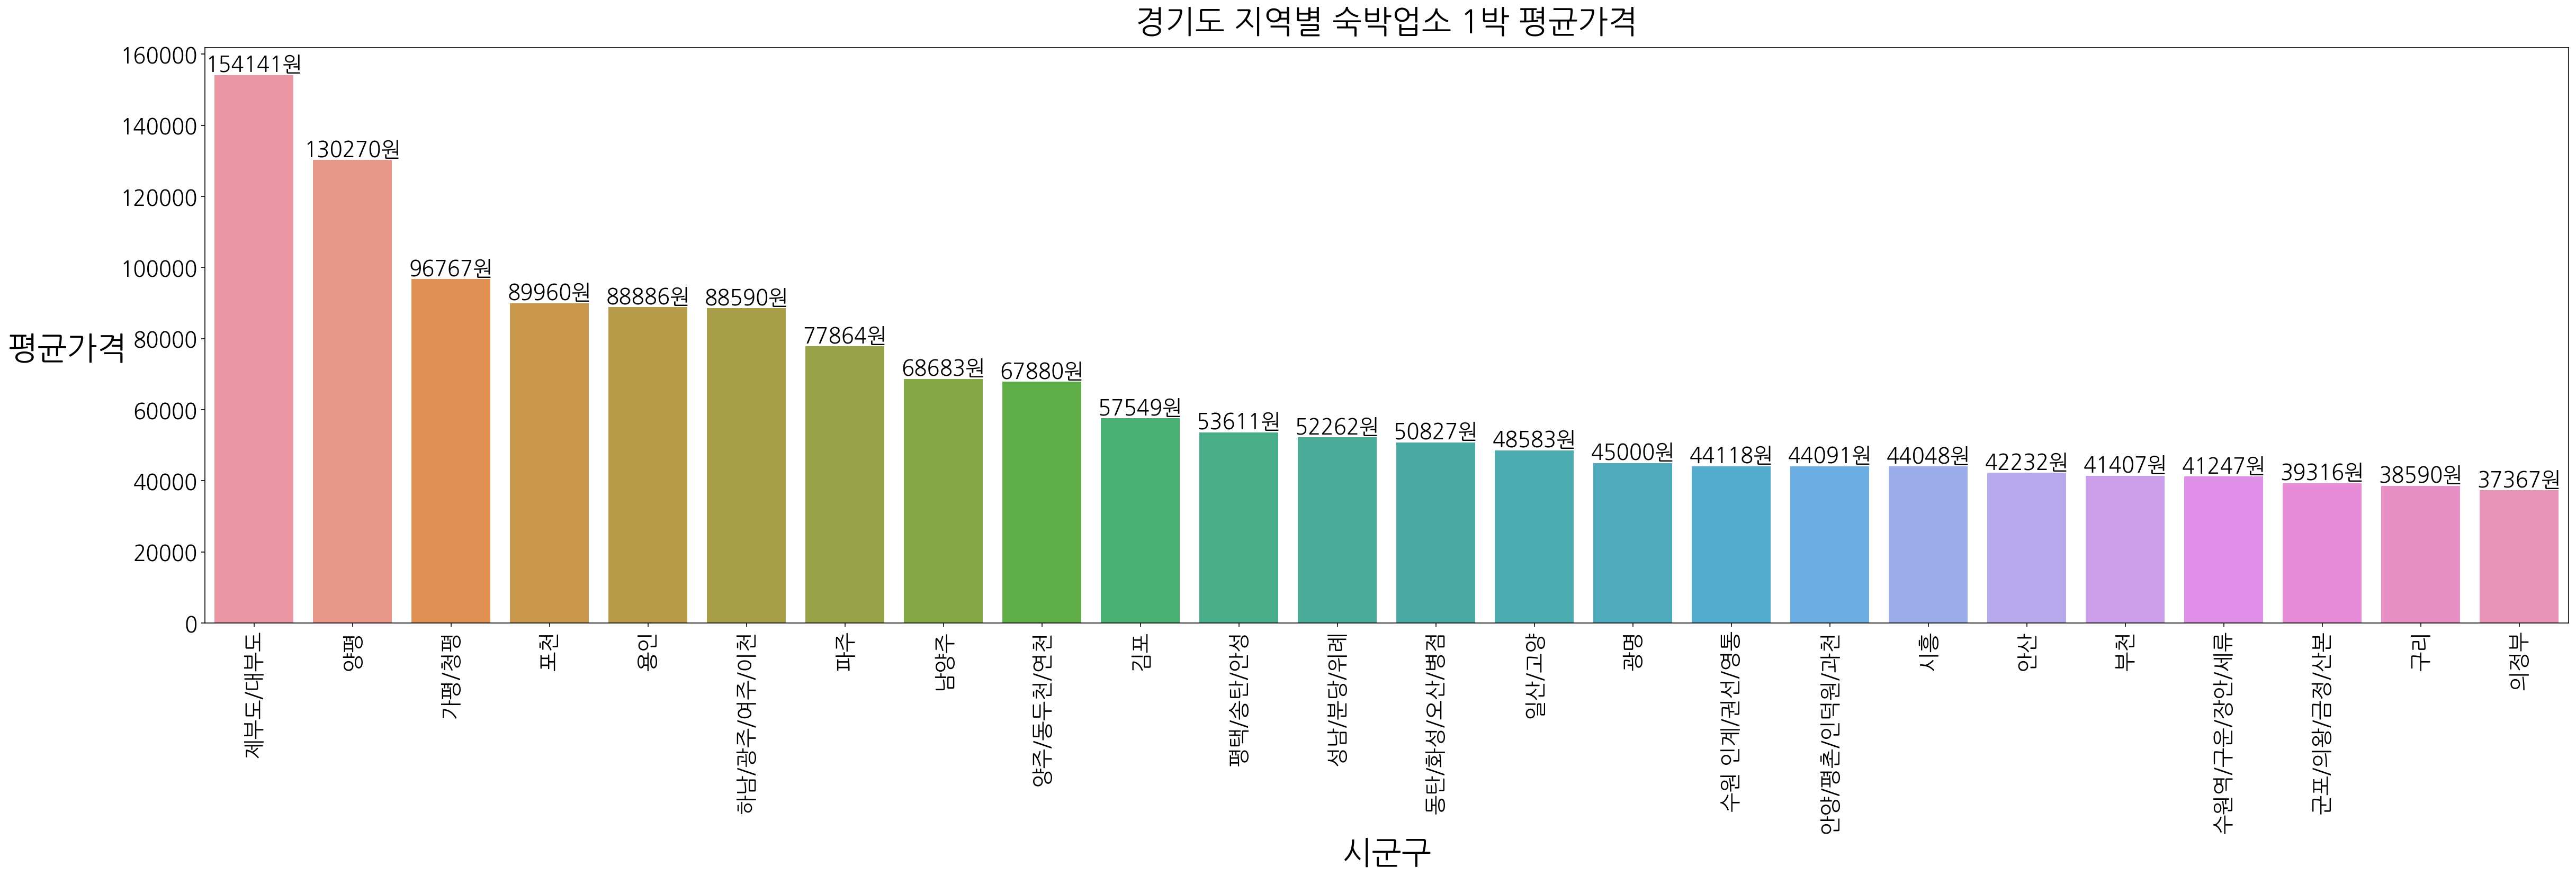

In [11]:
############## 경기도 지역별 평균숙박업소 가격 그래프
########## 모든 업소의 최저가격을 가지고 추산한 것임으로 종합 가격 평균은 아님.
ax = plt.figure(figsize=(40,10))
ax = sns.barplot(data = df2, x='loc2', y = 'lowest_price')
ax.set_title('경기도 지역별 숙박업소 1박 평균가격',
            pad=15.0)
ax.set_xlabel('시군구')
ax.set_ylabel('평균가격',rotation=0,labelpad=50,position=(0,0.45,0))
for i in range(len(df2)):
    plt.text(i,round(df2.iloc[i][2]),str(round(df2.iloc[i][2]))+'원',fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.xticks(rotation=90)
plt.show()
#plt.savefig('경기도 지역별 숙박업소 1박 평균가격.png',bbox_inches='tight', pad_inches=0.5) 

In [12]:
####################시군구별 숙밥업소 1박 평균가격 지도시각화
m = folium.Map(location=[37.4, 127.6],zoom_start=9)
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','lowest_price'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='평균 가격').add_to(m)
folium.Marker([37.313470, 127.004403],tooltip = '수원 인계/권선/영통 : 평균 44,118원').add_to(m)
folium.Marker([37.275449, 127.019896],tooltip = '수원역/구운/장안/세류 : 평균 41,247원').add_to(m)
folium.Marker([37.171381, 126.884218],tooltip = '동탄/화성/오산/병점 : 평균 50,827원').add_to(m)
folium.Marker([37.403023, 126.910758],tooltip = '안양/평촌/인덕원/과천 : 평균 44,091원').add_to(m)
folium.Marker([37.431085, 127.104284],tooltip = '성남/분당/위례 : 평균 52,262원').add_to(m)
folium.Marker([37.224493, 127.217709],tooltip = '용인 : 평균 88,886원').add_to(m)
folium.Marker([37.340276, 127.498654],tooltip = '하남/광주/여주/이천 : 평균 88,590원').add_to(m)
folium.Marker([37.322860, 126.836380],tooltip = '안산 : 평균 42,232원').add_to(m)
folium.Marker([37.331655, 126.952470],tooltip = '군포/의왕/금정/산본 : 평균 39,316원').add_to(m)
folium.Marker([37.445599880790006, 126.86368163481345],tooltip = '광명 : 평균 45,000원').add_to(m)
folium.Marker([37.03045492434268, 127.0522890833492],tooltip = '평택/송탄/안성 : 평균 53,611원').add_to(m)
folium.Marker([37.382220, 126.796723],tooltip = '시흥 : 평균 44,048원').add_to(m)
folium.Marker([37.50207903672109, 126.78929104867596],tooltip = '부천 : 평균 41,407원').add_to(m)
folium.Marker([37.66834646555091, 126.81319911142413],tooltip = '일산/고양 : 평균 48,583원').add_to(m)
folium.Marker([37.82966561311584, 126.7849087173275],tooltip = '파주 : 평균 77,864원').add_to(m)
folium.Marker([37.68449560372025, 126.62742093389424],tooltip = '김포 : 평균 57,549원').add_to(m)
folium.Marker([37.73607454619909, 127.07616108173816],tooltip = '의정부 : 평균 37,367원').add_to(m)
folium.Marker([37.59555331991309, 127.13231660420112],tooltip = '구리 : 평균 38,590원').add_to(m)
folium.Marker([37.65524201722542, 127.23767536287261],tooltip = '남양주 : 평균 68,683원').add_to(m)
folium.Marker([37.965186179580634, 127.24306708302258],tooltip = '포천 : 평균 89,960원').add_to(m)
folium.Marker([37.88002639646038, 127.05069251716277],tooltip = '양주/동두천/연천 : 평균 67,880원').add_to(m)
folium.Marker([37.527720241562896, 127.57571048717736],tooltip = '양평 : 평균 130,270원').add_to(m)
folium.Marker([37.82018394540285, 127.45312345687388],tooltip = '가평/청평 : 평균 96,767원').add_to(m)
m

In [96]:
m.save('시군구별 숙밥업소 1박 평균가격.html')

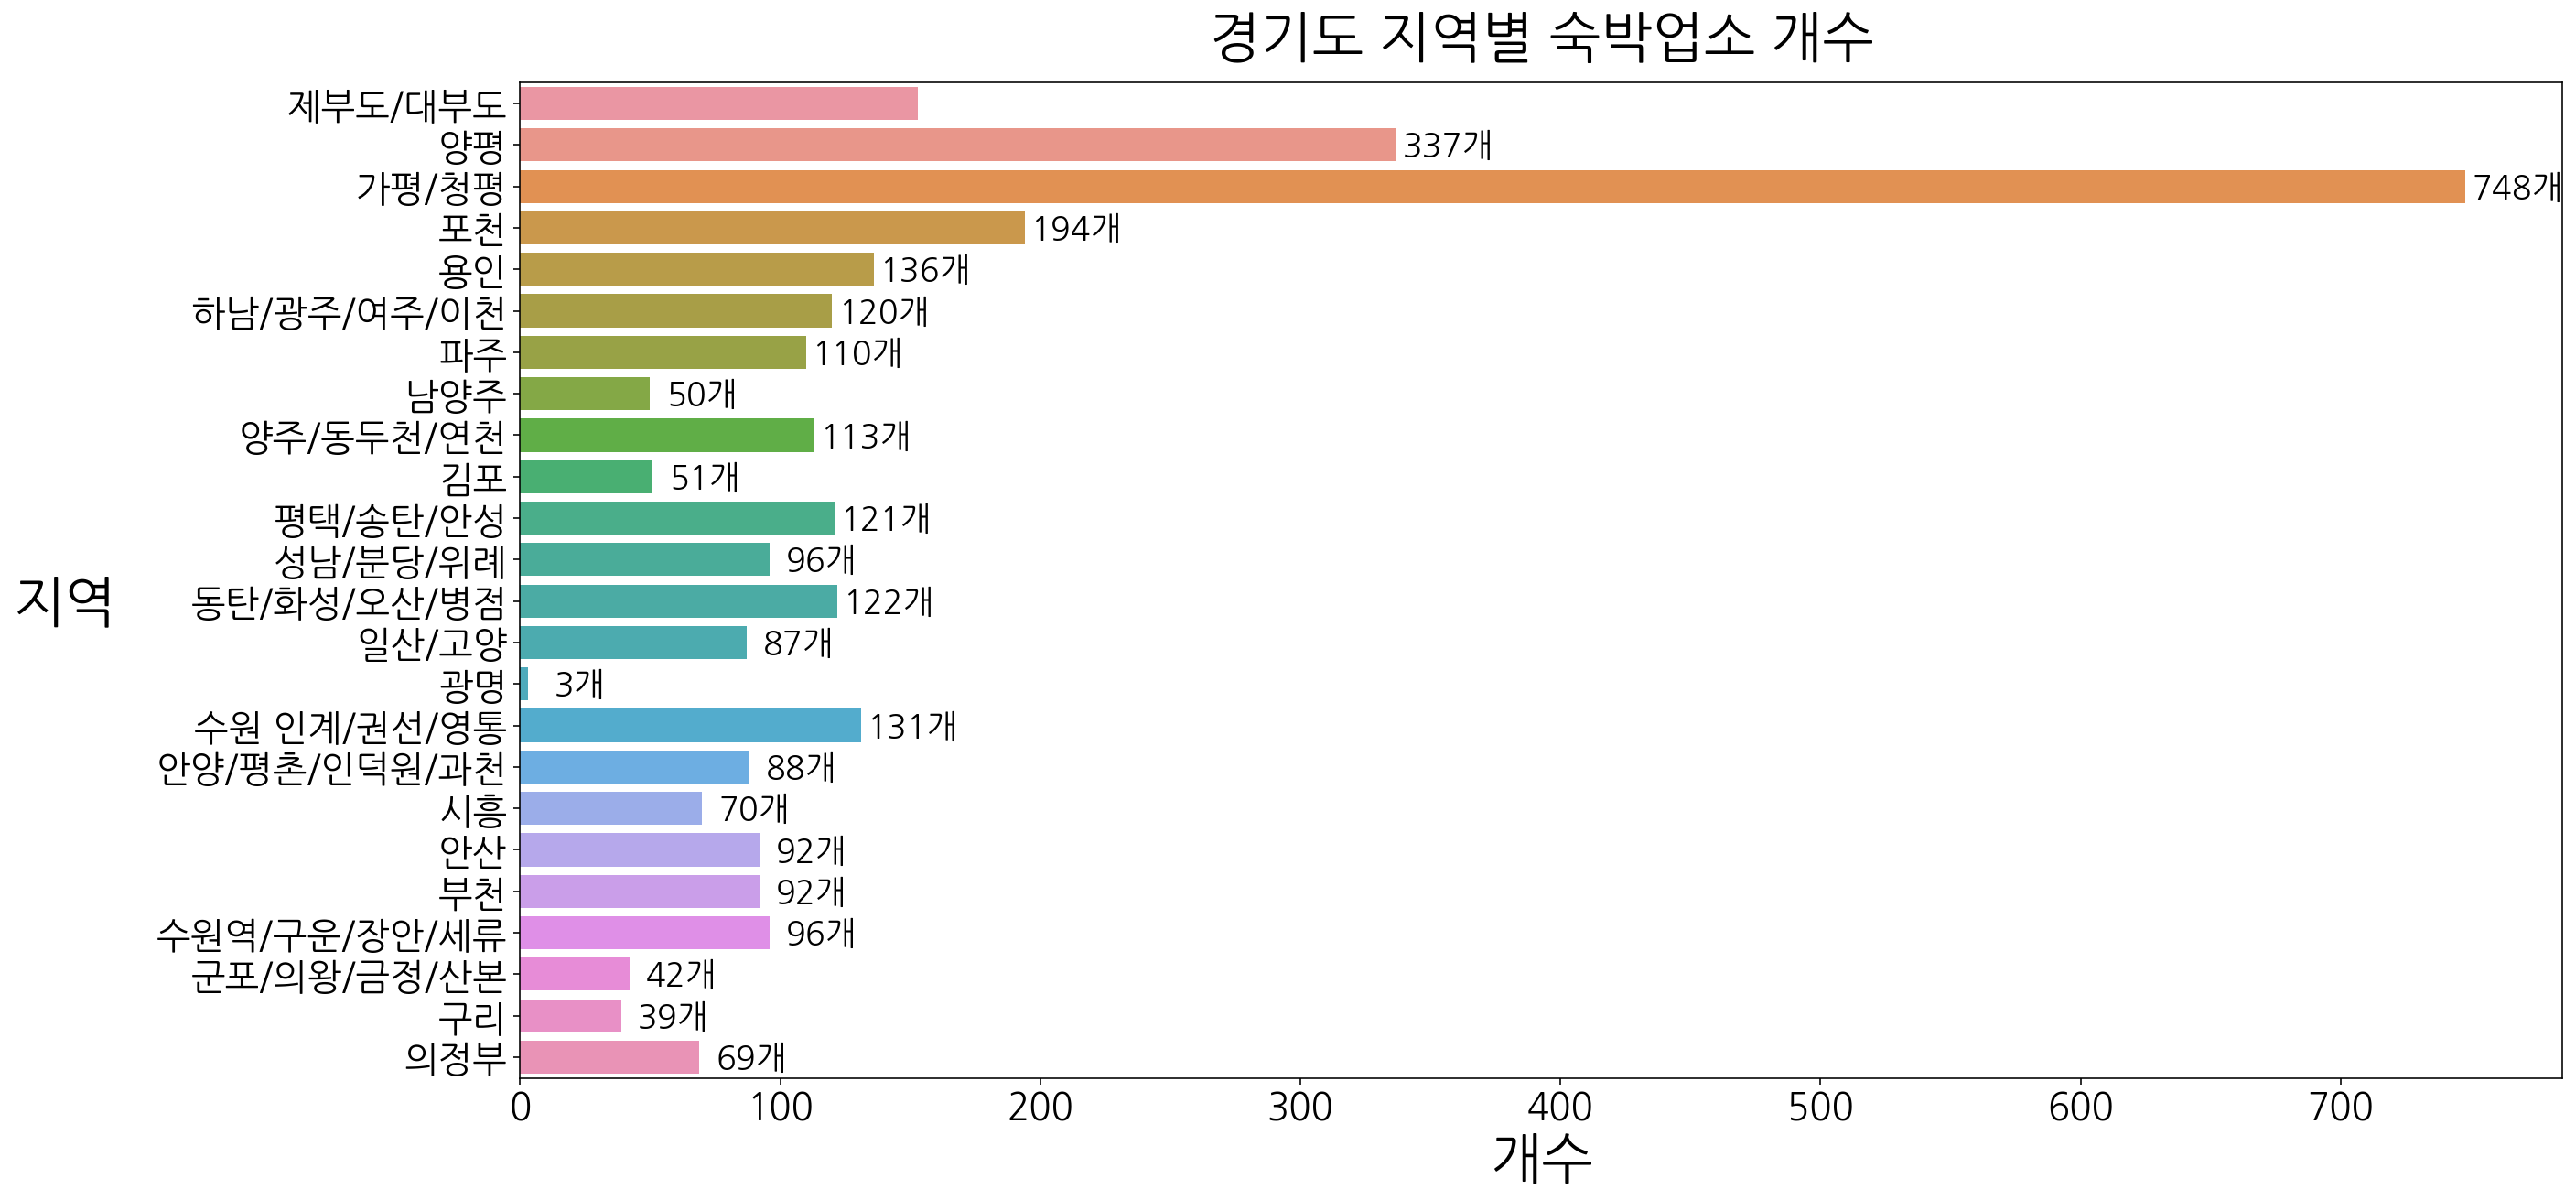

In [55]:
############## 경기도 지역별 숙박업소 개수
########## 모든 업소의 최저가격을 가지고 추산한 것임으로 종합 가격 평균은 아님.
ax = plt.figure(figsize=(20,10))
ax = sns.barplot(data = df2, x='count', y = 'loc2')
ax.set_title('경기도 지역별 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('개수')
ax.set_ylabel('지역',rotation=0,labelpad=50,position=(0,0.45,0))
for p in ax.patches:
    ax.annotate(f'\n{int(p.get_width())}개', (p.get_width()+20,p.get_y()-0.8), ha='center', va='top', color='black', size=18)
plt.xticks(rotation=0)
#plt.show()
plt.savefig('경기도 지역별 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

In [31]:
#### 시군구별 숙박업소 개수
m = folium.Map(location=[37.8, 127.6],zoom_start=8)
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','count'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='숙박업소 개수').add_to(m)
folium.Marker([37.313470, 127.004403],tooltip = '수원 인계/권선/영통 : '+str(df2['count'][15])+'개').add_to(m)
folium.Marker([37.275449, 127.019896],tooltip = '수원역/구운/장안/세류 : '+str(df2['count'][20])+'개').add_to(m)
folium.Marker([37.171381, 126.884218],tooltip = '동탄/화성/오산/병점 : '+str(df2['count'][12])+'개').add_to(m)
folium.Marker([37.403023, 126.910758],tooltip = '안양/평촌/인덕원/과천 : '+str(df2['count'][16])+'개').add_to(m)
folium.Marker([37.431085, 127.104284],tooltip = '성남/분당/위례 : '+str(df2['count'][11])+'개').add_to(m)
folium.Marker([37.224493, 127.217709],tooltip = '용인 : '+str(df2['count'][4])+'개').add_to(m)
folium.Marker([37.340276, 127.498654],tooltip = '하남/광주/여주/이천 : '+str(df2['count'][5])+'개').add_to(m)
folium.Marker([37.322860, 126.836380],tooltip = '안산 : '+str(df2['count'][18])+'개').add_to(m)
folium.Marker([37.331655, 126.952470],tooltip = '군포/의왕/금정/산본 : '+str(df2['count'][21])+'개').add_to(m)
folium.Marker([37.445599880790006, 126.86368163481345],tooltip = '광명 : '+str(df2['count'][14])+'개').add_to(m)
folium.Marker([37.03045492434268, 127.0522890833492],tooltip = '평택/송탄/안성 : '+str(df2['count'][10])+'개').add_to(m)
folium.Marker([37.382220, 126.796723],tooltip = '시흥 : '+str(df2['count'][17])+'개').add_to(m)
folium.Marker([37.50207903672109, 126.78929104867596],tooltip = '부천 : '+str(df2['count'][19])+'개').add_to(m)
folium.Marker([37.66834646555091, 126.81319911142413],tooltip = '일산/고양 : '+str(df2['count'][13])+'개').add_to(m)
folium.Marker([37.82966561311584, 126.7849087173275],tooltip = '파주 : '+str(df2['count'][6])+'개').add_to(m)
folium.Marker([37.68449560372025, 126.62742093389424],tooltip = '김포 : '+str(df2['count'][9])+'개').add_to(m)
folium.Marker([37.73607454619909, 127.07616108173816],tooltip = '의정부 : '+str(df2['count'][23])+'개').add_to(m)
folium.Marker([37.59555331991309, 127.13231660420112],tooltip = '구리 : '+str(df2['count'][22])+'개').add_to(m)
folium.Marker([37.65524201722542, 127.23767536287261],tooltip = '남양주 : '+str(df2['count'][7])+'개').add_to(m)
folium.Marker([37.965186179580634, 127.24306708302258],tooltip = '포천 : '+str(df2['count'][3])+'개').add_to(m)
folium.Marker([37.88002639646038, 127.05069251716277],tooltip = '양주/동두천/연천 : '+str(df2['count'][8])+'개').add_to(m)
folium.Marker([37.527720241562896, 127.57571048717736],tooltip = '양평 : '+str(df2['count'][1])+'개').add_to(m)
folium.Marker([37.82018394540285, 127.45312345687388],tooltip = '가평/청평 : '+str(df2['count'][2])+'개').add_to(m)
m
### 색상 https://dailyheumsi.tistory.com/m/144?category=854906

In [32]:
m.save('시군구별 숙밥업소 수.html')